In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input
from PIL import Image

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load lại mô hình
model = load_model("full_model_ContinueTrain.keras")

# Kiểm tra input shape
print("Input shape của model:", model.input_shape)

# Nếu model cần nhiều channel (RGB, v.v.)
expected_channels = model.input_shape[-1]
color_mode = "grayscale" if expected_channels == 1 else "rgb"

# Data preprocessing giống như khi train
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    'D:/DatasetDoAnCoSO/dataset_emotion/images/validation',
    target_size=(56, 56),
    color_mode=color_mode,
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Đánh giá mô hình (val_loss và val_accuracy)
results = model.evaluate(test_generator, verbose=1)
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Input shape của model: (None, 56, 56, 1)
Found 7066 images belonging to 7 classes.


c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 60s 537ms/step - accuracy: 0.6394 - loss: 1.2390
loss: 1.0881
compile_metrics: 0.6877


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 13,428,247 (51.22 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

 Optimizer params: 8,949,520 (34.14 MB)

In [1]:
import numpy as np
from tensorflow.keras.models import load_model

# Load mô hình đã huấn luyện
model = load_model("full_model_ContinueTrain.keras")

# In ra thông tin về các lớp trong mô hình
for i, layer in enumerate(model.layers):
    layer_name = layer.__class__.__name__  # Lấy tên lớp
    
    # Thử lấy shape đầu ra của lớp bằng cách truyền một tensor mẫu vào
    try:
        # Truyền vào dữ liệu mẫu để kiểm tra output shape
        input_shape = model.input_shape[1:]  # Bỏ batch size
        dummy_input = np.random.random((1, *input_shape))  # Dữ liệu ngẫu nhiên mẫu (1 ảnh với kích thước input)
        output = layer(dummy_input)  # Truyền dữ liệu vào lớp
        output_shape = output.shape  # Lấy kích thước đầu ra
    except Exception as e:
        output_shape = str(e)
    
    print(f"Lớp {i+1}: {layer_name} - Output shape: {output_shape}")


Lớp 1: Conv2D - Output shape: (1, 56, 56, 64)
Lớp 2: BatchNormalization - Output shape: Input 0 of layer "batch_normalization" is incompatible with the layer: expected axis -1 of input shape to have value 64, but received input with shape (1, 56, 56, 1)
Lớp 3: Activation - Output shape: (1, 56, 56, 1)
Lớp 4: MaxPooling2D - Output shape: (1, 28, 28, 1)
Lớp 5: Dropout - Output shape: (1, 56, 56, 1)
Lớp 6: Conv2D - Output shape: Input 0 of layer "conv2d_1" is incompatible with the layer: expected axis -1 of input shape to have value 64, but received input with shape (1, 56, 56, 1)
Lớp 7: BatchNormalization - Output shape: Input 0 of layer "batch_normalization_1" is incompatible with the layer: expected axis -1 of input shape to have value 128, but received input with shape (1, 56, 56, 1)
Lớp 8: Activation - Output shape: (1, 56, 56, 1)
Lớp 9: MaxPooling2D - Output shape: (1, 28, 28, 1)
Lớp 10: Dropout - Output shape: (1, 56, 56, 1)
Lớp 11: Conv2D - Output shape: Input 0 of layer "conv2d_2

In [2]:
from tensorflow.keras.models import load_model

# Load model
model = load_model("full_model_ContinueTrain.keras")

# In thông tin layer
print("📋 Danh sách layer trong model:")
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name}, trainable={layer.trainable}, type={type(layer).__name__}")

print(f"\n👉 Tổng số layer: {len(model.layers)}")

📋 Danh sách layer trong model:
0: conv2d, trainable=True, type=Conv2D
1: batch_normalization, trainable=True, type=BatchNormalization
2: activation, trainable=True, type=Activation
3: max_pooling2d, trainable=True, type=MaxPooling2D
4: dropout, trainable=True, type=Dropout
5: conv2d_1, trainable=True, type=Conv2D
6: batch_normalization_1, trainable=True, type=BatchNormalization
7: activation_1, trainable=True, type=Activation
8: max_pooling2d_1, trainable=True, type=MaxPooling2D
9: dropout_1, trainable=True, type=Dropout
10: conv2d_2, trainable=True, type=Conv2D
11: batch_normalization_2, trainable=True, type=BatchNormalization
12: activation_2, trainable=True, type=Activation
13: max_pooling2d_2, trainable=True, type=MaxPooling2D
14: dropout_2, trainable=True, type=Dropout
15: conv2d_3, trainable=True, type=Conv2D
16: batch_normalization_3, trainable=True, type=BatchNormalization
17: activation_3, trainable=True, type=Activation
18: max_pooling2d_3, trainable=True, type=MaxPooling2D
1

Found 7066 images belonging to 7 classes.


c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 51s 457ms/step

📋 Classification Report:
              precision    recall  f1-score   support

       angry       0.63      0.58      0.60       960
     disgust       0.71      0.69      0.70       111
        fear       0.60      0.49      0.54      1018
       happy       0.86      0.89      0.87      1825
     neutral       0.60      0.69      0.64      1216
         sad       0.54      0.57      0.56      1139
    surprise       0.82      0.79      0.80       797

    accuracy                           0.69      7066
   macro avg       0.68      0.67      0.67      7066
weighted avg       0.69      0.69      0.69      7066



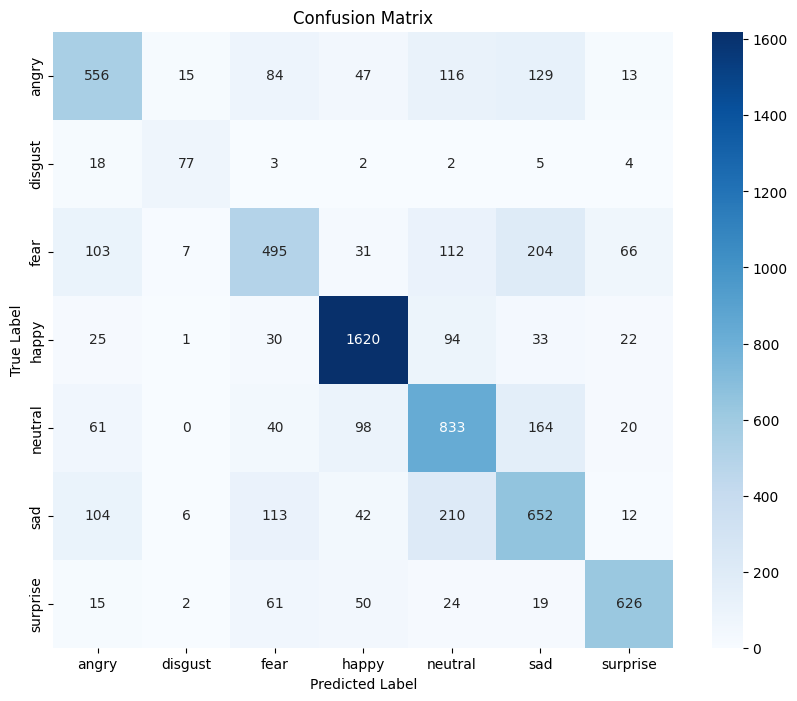

In [3]:
from tensorflow.keras.models import load_model

model = load_model('C:/Users/DELL/Desktop/model/App_Mobile_Emotion/training_model/CNN_model/full_model_notEarlyStopPart2.keras')



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🧩 Bước 0: Load model (nếu chưa load)
# model = load_model("duong_dan_toi_model.h5")  # Bỏ comment nếu cần

# 🧩 Bước 1: Tạo lại validation_generator
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'  # ✅ Thay đường dẫn đúng

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(56, 56),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# 🧩 Bước 2: Dự đoán toàn bộ tập validation
y_pred_prob = model.predict(validation_generator, verbose=1)  # ❌ KHÔNG dùng `steps=...`
y_pred_class = np.argmax(y_pred_prob, axis=1)

# 🧩 Bước 3: Lấy nhãn thật và in Classification Report
y_true = validation_generator.classes
target_names = list(validation_generator.class_indices.keys())

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred_class, target_names=target_names))

# 🧩 Bước 4: Vẽ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()